In [2]:
import bokeh
import pandas as pd
import folium
from folium.plugins import MarkerCluster

In [19]:
dflist = [
    'FirstClass_Manipulated.csv',
    'SecondClass_Manipulated.csv',
    'ThirdClass_Manipulated.csv',
    # 'CrossChannel.csv',
    'DeckCrew_Manipulated.csv',
    'EngineeringCrew_Manipulated.csv',
    'Officers_Manipulated.csv',
    'OrchestraCrew_Manipulated.csv',
    'PostalCrew_Manipulated.csv',
    'RestaurantCrew_Manipulated.csv',
    'VictuallingCrew_Manipulated.csv'
]

# dfdic = {
#     DeckCrew: 'DeckCrew_Manipulated.csv',
#     EngineeringCrew: 'EngineeringCrew_Manipulated.csv',
#     FirstClass: 'FirstClass_Manipulated.csv',
#     Officers: 'Officers_Manipulated.csv',
#     OrchestraCrew: 'OrchestraCrew_Manipulated.csv',
#     PostalCrew: 'PostalCrew_Manipulated.csv',
#     RestaurantCrew: 'RestaurantCrew_Manipulated.csv',
#     SecondClass: 'SecondClass_Manipulated.csv',
#     ThirdClass: 'ThirdClass_Manipulated.csv',
#     VictuallingCrew: 'VictuallingCrew_Manipulated.csv'
# }

dfdic = {
    'FirstClass': ['FirstClass_Manipulated.csv', '#DAA520', 'credit-card-alt'],
    'SecondClass':[ 'SecondClass_Manipulated.csv', '#C0C0C0', 'money'],
    'ThirdClass':[ 'ThirdClass_Manipulated.csv', '#CD7F32', 'trash'],
    # 'CrossChannel':[ 'CrossChannel_Manipulated.csv', '#CD7F32', 'times'],
    'DeckCrew': ['DeckCrew_Manipulated.csv', "#1E90FF", 'glass'],
    'EngineeringCrew':['EngineeringCrew_Manipulated.csv', '#663300', 'wrench'],
    'Officers': ['Officers_Manipulated.csv', '#000080', 'compass'],
    'OrchestraCrew':[ 'OrchestraCrew_Manipulated.csv', '#B22222', 'music'],
    'PostalCrew':[ 'PostalCrew_Manipulated.csv', '#708090', 'envelope'],
    'RestaurantCrew':[ 'RestaurantCrew_Manipulated.csv', '#808000', 'cutlery'],
    'VictuallingCrew':[ 'VictuallingCrew_Manipulated.csv', "#264348", 'ship']
}

colordic = {
    True: 'green',
    False: "red"}

dlist = list(dfdic)

passengerlist =  [dlist[0],
                  dlist[1],
                  dlist[2],
                  # dlist[3]
                  ]

crewlist = [dlist[4],
            dlist[5],
            dlist[6],
            dlist[7],
            dlist[6],
            dlist[7],
            dlist[8]]

print (passengerlist)

['FirstClass', 'SecondClass', 'ThirdClass']


AttributeError: 'str' object has no attribute 'head'

In [4]:
# from geopy import Nominatim
# geolocator = Nominatim(user_agent="geoapiExercises")
# def get_country(row):
#     Latitude = str(row["latitude"])
#     Longitude = str(row["longitude"])
#     pos = str(Latitude+","+Longitude)
#     locations = geolocator.reverse(str(Latitude+","+Longitude))
#     return locations.raw['address']['country']
#
# for df in dflist:
#     df['country'] = df.apply(lambda row: get_country(row), axis = 1)

In [5]:
# from bokeh.plotting import curdoc, output_file
# from bokeh.models.widgets import Button, CheckboxGroup, CheckboxButtonGroup
# from bokeh.layouts import widgetbox, row
# from bokeh.models import ColumnDataSource, Callback
# output_file("states.html", title="states")
#
# def getList():
#     new = CheckBoxType.active
#     list = []
#     activelist = []
#     if new == 'Passengers':
#         list = passengerlist
#         activelist = [0,3]
#     elif new == "Crew":
#         list = crewlist
#         activelist = [4,8]
#
#     checkbox_button_group = CheckboxButtonGroup(labels=list, active=activelist)
#     show(checkbox_button_group)
#
# LABELS = ["Passengers", "Crew"]
# CheckBoxType = CheckboxButtonGroup(labels=LABELS, active = [0,1])
#
# CheckBoxType.on_change(getList)
#
# x = CheckBoxType.active
# y = x
# while y != x:
#     getList(x)
#     y = x
#
# CheckBoxType.on_change(getList(CheckBoxType.active))

ValueError: attempted to add a callback on nonexistent CheckboxButtonGroup.<function getList at 0x000001ECA7ABB040> property

In [16]:
map1 = folium.Map(
    location=[50,0],
    tiles='stamentoner',
    zoom_start=1,
)

teller = 0
for naam in dfdic:
    path="Manipulated/"+dfdic[naam][0]
    df = pd.read_csv(path, index_col=0)
    df = df.dropna(subset = ["latitude"]).reset_index(drop = True)
    dflist[teller] = df

    unique = df.groupby('Hometown')['Name'].nunique()
    # print (unique)
    title  = dlist[teller]
    feature_group = folium.FeatureGroup(title)
    marker_cluster = MarkerCluster().add_to(map1)

    for row in df.itertuples():
        folium.Marker(
        location=[row.latitude , row.longitude],
        radius = 2,
        popup=(str(row.Name)),
        # fill=True, # Set fill to True
        # fill_color=color_producer(el),
        color = dfdic[naam][1],
        icon=folium.Icon(color=colordic[row.Survived],
                         icon_color='white',
                         icon=dfdic[naam][2],
                         angle=0,
                         prefix='fa')).add_to(marker_cluster)

        # folium.Marker(
        # location=[row.latitude , row.longitude],
        # radius = 2,
        # popup=(str(row.Name)),
        # # fill=True, # Set fill to True
        # # fill_color=color_producer(el),
        # color = dfdic[naam][1],
        # icon=folium.Icon(color=colordic[row.Survived],
        #                  icon_color='white',
        #                  icon=dfdic[naam][2],
        #                  angle=0,
        #                  prefix='fa')).add_to(feature_group)

    # feature_group.add_to(map1)
    teller = teller +1

# folium.LayerControl().add_to(map1)
map1

In [28]:
from folium.plugins import HeatMap
map2 = folium.Map(
    location=[50,0],
    tiles='stamentoner',
    zoom_start=1,
)
teller = 0
for naam in dfdic:
    path="Manipulated/"+dfdic[naam][0]
    df = pd.read_csv(path, index_col=0)
    df = df.dropna(subset = ["latitude"]).reset_index(drop = True)
    dflist[teller] = df

    unique = df.groupby('Hometown')['Name'].nunique()
    # print (unique)
    title  = dlist[teller]

# List comprehension to make out list of lists
    heat_data = [[row['latitude'],row['longitude']] for index, row in df.iterrows()]

# Plot it on the map
    HeatMap(heat_data).add_to(map2)

# Display the map
folium.LayerControl().add_to(map2)
map2

#https://www.datasciencecentral.com/profiles/blogs/fun-with-maps-part-2 LEGEND


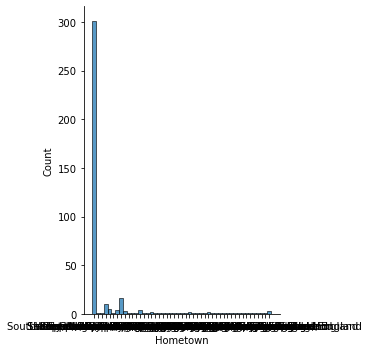

In [31]:
import seaborn as sns
sns.displot(dflist[0], x="Hometown")

ValueError: Could not interpret value `Hometown` for parameter `x`

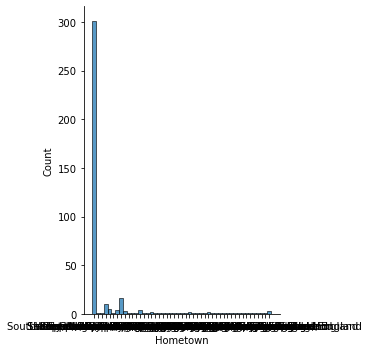

In [30]:
import seaborn as sns
for df in dflist:
    sns.displot(dflist[0], x="Hometown")